In [96]:
import pandas as pd
import numpy as np
import nest_asyncio
nest_asyncio.apply()
import account_mgmt as accmgmt

In [97]:
creds = pd.read_csv(r'C:\Users\kmavy\OneDrive\Desktop\credentials.csv')

In [105]:
client_id = creds['client_id'].values[0]
client_secret =creds['client_secret'].values[0]

ws = accmgmt.DeribitWS(client_id=client_id, client_secret=client_secret, live=True)
positions = ws.get_positions(currency='ETH')['result']

pnl,delta,vega,theta,gamma = 0,0,0,0,0
for dets in positions:
    pnl+=dets['floating_profit_loss_usd']
    delta +=dets['delta']
    theta +=dets['theta']
    vega +=dets['vega']
    gamma+=dets['gamma']


Authentication success


In [100]:
shortvolpnl = pd.DataFrame([pnl],index = [pd.datetime.today().strftime('%Y-%m-%d')],columns = ['daily_pnl'])
portfolio_greeks = pd.DataFrame(np.array([delta,vega,theta,gamma]).reshape(-1,4),index = [pd.datetime.today().strftime('%Y-%m-%d')],columns = ['delta','vega','theta','gamma'])

C:\Users\kmavy\AppData\Local\Temp\ipykernel_3564\3215754535.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  shortvolpnl = pd.DataFrame([pnl],index = [pd.datetime.today().strftime('%Y-%m-%d')],columns = ['daily_pnl'])
C:\Users\kmavy\AppData\Local\Temp\ipykernel_3564\3215754535.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  portfolio_greeks = pd.DataFrame(np.array([delta,vega,theta,gamma]).reshape(-1,4),index = [pd.datetime.today().strftime('%Y-%m-%d')],columns = ['delta','vega','theta','gamma'])


In [101]:
import csv
perf_path =os.path.join(os.getcwd(),'performance_analytics\\perf_analytics.csv') 
greeks_path = os.path.join(os.getcwd(),'performance_analytics\\portfolio_greeks.csv') 

In [107]:
with open(perf_path,'a',newline = '') as csvfile:
    writer = csv.writer(csvfile)
    for i in range(len(shortvolpnl)):
        temp = shortvolpnl.reset_index()
        row = temp.iloc[i].values
        writer.writerow(row)
csvfile.close()



with open(greeks_path,'a',newline = '') as csvfile:
    writer = csv.writer(csvfile)
    for i in range(len(portfolio_greeks)):
        temp = portfolio_greeks.reset_index()
        row = temp.iloc[i].values
        writer.writerow(row)
csvfile.close()

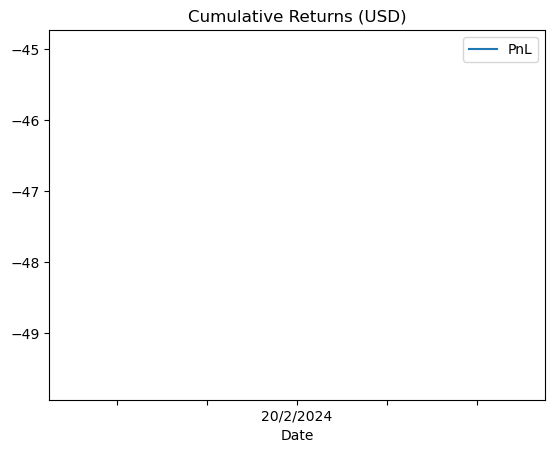

In [124]:
pic = pd.read_csv(r'performance_analytics\\perf_analytics.csv',index_col = 0).cumsum().plot(title = 'Cumulative Returns (USD)').get_figure()
pic.savefig('cumulative_performance.png')

In [31]:
-0.011144*2913

-32.462472

In [25]:
pd.DataFrame(ws.account_summary('ETH',extended=False)['result'])['total_pl']

eth_usd               -0.010761
non_matching_engine   -0.010761
matching_engine       -0.010761
Name: total_pl, dtype: float64

In [30]:
pd.DataFrame(ws.account_summary('ETH',extended=False)['result'])[['options_pl']]

,options_pl
eth_usd,-0.011144
non_matching_engine,-0.011144
matching_engine,-0.011144


In [109]:
-0.0105*2800

-29.400000000000002

In [108]:
pd.DataFrame(ws.account_summary('ETH',extended=False)['result'])[['total_pl']]

,total_pl
eth_usd,-0.010537
non_matching_engine,-0.010537
matching_engine,-0.010537


In [67]:
ws.get_positions(instrument='ETH')

{'jsonrpc': '2.0',
 'id': 0,
 'error': {'message': 'Invalid params',
  'data': {'param': 'currency', 'reason': 'value required'},
  'code': -32602},
 'usIn': 1708354861337483,
 'usOut': 1708354861337602,
 'usDiff': 119,
 'testnet': False}